# Fluctuating Fahrenheit: Suicide Risk?

# Overview

For this project, we explored the relationship between temperature trends and the number of suicides across genders in New York City from 2008 to 2014. To accomplish this, we used linear regression to check whether there is a relationship between temperature deviations, seasonal counts of suicides, and counts of suicides of men and women. After verifying whether the observation occurred by chance through checking the p-values, we concluded that there was no statistical basis to reject our null hypothesis, meaning we were unable to conclude any significant correlation between higher temperature fluctuations and people’s suicide rates, or any difference among men and women’s suicide rates. 

# Names

- Jonathan Chou
- Eli Marx-Kahn
- Kevin Lee
- Sherry Ma

<a id='research_question'></a>
# Research Question

Is there a relationship between temperature trends and number of suicides in New York City? More specifically:

1. Do suicide rates in a given season differ when average temperatures in that season deviate from typical* seasonal temperatures?
2. Do suicide rates differ between men and women in years when there is higher temperature fluctuation?

**Typical refers here to the average seasonal temperature across the years 2008-2014*

<a id='background'></a>

## Background & Prior Work

All of the members in our group are or have been involved with work in health-related areas, and therefore, as a group, we agreed to work on a project that would address the topic of societal and community wellbeing.
In recent years, more and more studies have been examining the topic of global warming, as we witness an increasing amount of evidence of climate change around us. Researchers have discovered a potential link between the rising temperatures and people’s mental health, reflected especially in the rate of people’s suicides, which is one of the top 10-15 causes of deaths globally. [1] 

A study conducted by Stanford University researchers, which was published in the journal of Nature Climate Change, shows that rising temperatures induce deteriorated mental wellbeing, reflected in people’s rising suicidal rates and expressions of their declining mental wellbeing on social media. Longitudinal data across thousands of counties and municipalities in the United States and Mexico over several decades and over 600 million social media updates are used. What they found is that suicide rates rise 0.7% in U.S. counties and 2.1% in Mexican municipalities for a 1°C increase in monthly average temperature, and the use of “depressive langauge” on social media shares the same pattern with higher local monthly temperatures. [1]

Another study published by Cambridge University Press, also looked into the relationship between daily temperature and daily suicide rates in England and Wales from 1993 to 2003. When the temperature was above 18°C, a 1°C increase in mean temperature was associated with a 3.8% and 5.0% rise in suicide and violent suicide respectively. And 75% of the suicides were found to be consistently by men throughout the years. [2]

However, as one study in India indicates, even though a 1°C increase above the temperature of 20°C in a single day’s temperature is found to cause an average of 70 suicides, there are also underlying implications of higher temperatures leading to people’s higher suicidal rates, such as by a reduced crop yields during India’s agricultural growing seasons. [3]  

Based on the prior work in this area, our group would like to further investigate the specific relationship between temperature fluctuation patterns and suicide rates. 


References:
- 1) https://www.nature.com/articles/s41558-018-0222-x.epdf?referrer_access_token=A9qM8HOuzsaVg4u1HHe6lNRgN0jAjWel9jnR3ZoTv0Od0PBRrqjld84cND8FX46EXQXeVI2E2Repk6was59BX9PDeqt2Z7Otq3pC5-smJOzgioBc34gddJjBjUicxEjPqBP9UM-jOutm6FIoG1sg_7adH_k2fX-WoZnGe2ZTqWcbnv_gmPQunxqENlB6LNFAeh_TvphjhuawiTfRvor5rNiWrPI8IbpOe5Ihui1ezUm2Xo8rmKfMYGxdycdbySxs6n9-K4bCkKLiz58WTZmApj6EAfje5v-FqT2UPa_HkNI%3D&tracking_referrer=www.theatlantic.com
- 2) https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/relationship-between-daily-suicide-counts-and-temperature-in-england-and-wales/C74E68D2E180CEADAB7101219DCCB86F
- 3) https://www.pnas.org/content/114/33/8746

# Hypothesis


We hypothesize that there is at least a moderately strong correlation between temperature trends and suicide rates in New York City. More specifically, we believe we will see an increase in suicide rates when seasonal temperatures deviate significantly from the typical temperatures seen in those seasons. We make this hypothesis with the knowledge that humans are creatures of habit by and large, and disruptions to the routines and environments that we are accustomed to can cause physiological and psychological change to occur. This volatility may exacerbate some existing physical or mental health issues, precipitating higher suicidal ideation and thus, perhaps, higher rates of suicide. We do not anticipate any significant differences in suicide rates across genders in years where there are abnormally hot or cold seasons.

# Dataset(s)

### Dataset 1
- Dataset Name: Suicide counts and rates in New York City 2000-2014
- Link to the dataset: https://www1.nyc.gov/assets/doh/downloads/pdf/epi/databrief75.pdf
     - 5th page of pdf
- Number of observations: 15
- Description: Suicide counts in NYC from 2000-2014 and broken down by gender, rate type.

### Dataset 2
- Dataset Name: Seasonal counts of suicide in New York City 2008-2014 
- Link to the dataset: https://www1.nyc.gov/assets/doh/downloads/pdf/epi/databrief75.pdf
    - 6th page of pdf
- Number of observations: 7
- Description: Suicide counts in NYC from 2008-2014 and 4 seasons.

### Dataset 3
- Dataset Name: New York City Temperature Trends 2008-2010 
- Link to the dataset: https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table
    - Must request air temperature data from NYC as CSV for specified date range
- Number of observations: 47733
- Description: Daily min/max/avg temperature gathered by the weather stations in New York for the years 2008-2010.

### Dataset 4
- Dataset Name: New York City Temperature Trends 2011-2013 
- Link to the dataset: https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table
     - Must request air temperature data from NYC as CSV for specified date range
- Number of observations: 62131
- Description: Daily min/max/avg temperature gathered by the weather stations in New York for the years 2011-2013.

### Dataset 5
- Dataset Name: New York City Temperature Trends 2014 
- Link to the dataset: https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table
    - Must request air temperature data from NYC as CSV for specified date range
- Number of observations: 21809
- Description: Daily min/max/avg temperature gathered by the weather stations in New York for the year 2014.

### Multiple Datasets/Merge:
- Dataset 1 and 2 will be combined to one larger dataset where extra columns will be added as the suicide data pertain to different variables.
- Datasets 3, 4, and 5 all track the same variables with different timeframe observations, so they will be combined to one larger dataset that adds more rows. This way we have one dataset that contains the temperature data from 2008 to 2014. 

# Setup

In [1]:
#main imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# Supress all warnings for reader clarity
import warnings
warnings.filterwarnings("ignore")

#getting the suicide data
suicide_count_yearly = pd.read_csv("Data/Suicide counts and rates in New York City 2000-2014.csv")
suicide_count_seasonal = pd.read_csv("Data/Seasonal counts of suicide in New York City 2008-2014.csv")

#getting the temperature data from all 3 datasets
dataset_2007 = pd.read_csv("Data/2007.csv")
dataset_2008_to_2010 = pd.read_csv("Data/2008-10.csv")
dataset_2011_to_2013 = pd.read_csv("Data/2011-13.csv")
dataset_2014 = pd.read_csv("Data/2014.csv")

# Data Cleaning

Initial Suicide Data Cleaning

In [2]:
## Suicide Data Cleaning

#the yearly suicide contains data from 2000-2014, we want to filter it out to 2008-2014
suicide_count_yearly['Year'] = suicide_count_yearly['Year'].astype(int)
suicide_count_yearly = suicide_count_yearly[suicide_count_yearly['Year'] >= 2008]
suicide_count_yearly = suicide_count_yearly.reset_index(drop=True)

#remove irrelevant columns (crude rate and ageadjusted rate)
suicide_count_yearly = suicide_count_yearly.iloc[:,:4]

#merge with the seasonal data
suicide_dataset = pd.merge(left=suicide_count_yearly, right=suicide_count_seasonal, how='inner')

#rename columns
new_columns = {'Winter':'Winter count of suicides (Total)', 'Spring':'Spring count of suicides (Total)', 
               'Summer':'Summer count of suicides (Total)', 'Fall':'Fall count of suicides (Total)'}
suicide_dataset = suicide_dataset.rename(new_columns, axis='columns')
suicide_dataset

,Year,Count of Suicides (Total),Count of suicides (Females),Count of suicides (Males),Winter count of suicides (Total),Spring count of suicides (Total),Summer count of suicides (Total),Fall count of suicides (Total)
0,2008,473,125,348,117,143,114,99
1,2009,475,115,360,129,103,128,115
2,2010,503,129,374,109,147,141,106
3,2011,509,128,381,126,133,137,113
4,2012,557,163,391,126,162,136,133
5,2013,550,146,404,142,158,133,117
6,2014,565,172,393,121,167,160,117


### Verifying Integrity of Dataset

Verifying Sum of Seasonal Counts to Total Yearly Counts

In [3]:
suicide_data_total_column = suicide_dataset['Count of Suicides (Total)']

#sum up seasonal total counts to check if matches yearly total count
season_columns = ['Winter count of suicides (Total)', 'Spring count of suicides (Total)', 
               'Summer count of suicides (Total)', 'Fall count of suicides (Total)']
sum_season_counts = suicide_dataset[season_columns].sum(axis=1)
print("Does seasonal suicide count match yearly total count? " + str(sum_season_counts.equals(suicide_data_total_column)))

Does seasonal suicide count match yearly total count? True


Verifying Sum of Gender Counts to Total Yearly Counts

In [4]:
#sum up gender specific counts to check if matches total count
gender_columns = ['Count of suicides (Females)', 'Count of suicides (Males)']
sum_gender_counts = suicide_dataset[gender_columns].sum(axis=1)
sum_gender_counts.equals(suicide_data_total_column)

##returned False, so checking which observations returned false
false_rows = suicide_dataset[sum_gender_counts.eq(suicide_data_total_column) == False]
false_rows

,Year,Count of Suicides (Total),Count of suicides (Females),Count of suicides (Males),Winter count of suicides (Total),Spring count of suicides (Total),Summer count of suicides (Total),Fall count of suicides (Total)
4,2012,557,163,391,126,162,136,133


**Analysis**: For this observation, the count of suicides for females (163) and the count of suicides for males (391) sum up to 554. This is different from the total count of suicides which may be due to human error. However, since $\frac{557-554}{557}$ < 1%, the margin of error is minimal which means that this observation can be kept.



### Temperature Data Cleaning

Initial Temperature Data Cleaning

In [5]:
#combine temperature datasets to get one dataframe with data from 2008-2014
temperature_data = pd.concat([dataset_2007, dataset_2008_to_2010, dataset_2011_to_2013, dataset_2014], sort=True)

#remove irrelevant columns (TAVG, NAME, TOBS)
temperature_data = temperature_data.drop(['TAVG','TOBS'], axis=1)

#remove stations not in New York
temperature_data = temperature_data[temperature_data.NAME.str.contains("NY US")]

#filter stations where there are observations with no recorded TMAX and TMIN in timeframe
max_observations = temperature_data['NAME'].value_counts().max()
highest_observation_stations = temperature_data['NAME'].value_counts() == max_observations
highest_observation_stations = highest_observation_stations.index[highest_observation_stations]

#separate all highest observation stations into separate DataFrames
stations = []
for station in highest_observation_stations:
    stations.append(temperature_data[temperature_data['NAME'] == station])

#check for missing data 
for s in stations:
    print("Any missing data? " + str(s.isnull().values.any()))

Any missing data? False
Any missing data? False
Any missing data? False


**Analysis**: There is no missing data in the stations that had the highest observation counts. However, this does not mean that everyday in between 2008 and 2014 had a recorded observation as they could have coincidentally had the same amount of missing days. Thus, we will verify by comparing number of observations with number of days in those 4 years.

In [6]:
#check each station for duplicate dates
for s in stations:
    print("No Duplicate Date: " + str(s["DATE"].is_unique))
    
#calculate total number of days between 2007-2014.
from datetime import date
f_date = date(2007, 12, 1)
l_date = date(2015, 1, 1) #up to and not including 1/1/2015
day_count = (l_date - f_date).days

print("Does total number of days match observation count: " + str(day_count == max_observations))

No Duplicate Date: True
No Duplicate Date: True
No Duplicate Date: True
Does total number of days match observation count: True


**Analysis**: Now that we have cleaned and verified each station's data, we will now assign each station to a variable for easier analysis.

In [7]:
station1 = stations[0].reset_index(drop=True)
station2 = stations[1].reset_index(drop=True)
station3 = stations[2].reset_index(drop=True)
display(station1)
display(station2)
display(station3)

,DATE,NAME,STATION,TMAX,TMIN
0,2007-12-01,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,39.0,25.0
1,2007-12-02,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,47.0,20.0
2,2007-12-03,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,50.0,33.0
3,2007-12-04,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,36.0,29.0
4,2007-12-05,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,33.0,28.0
...,...,...,...,...,...
2583,2014-12-27,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,54.0,37.0
2584,2014-12-28,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,54.0,42.0
2585,2014-12-29,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,46.0,35.0
2586,2014-12-30,"JFK INTERNATIONAL AIRPORT, NY US",USW00094789,36.0,28.0


,DATE,NAME,STATION,TMAX,TMIN
0,2007-12-01,"LAGUARDIA AIRPORT, NY US",USW00014732,42.0,26.0
1,2007-12-02,"LAGUARDIA AIRPORT, NY US",USW00014732,38.0,21.0
2,2007-12-03,"LAGUARDIA AIRPORT, NY US",USW00014732,49.0,34.0
3,2007-12-04,"LAGUARDIA AIRPORT, NY US",USW00014732,35.0,30.0
4,2007-12-05,"LAGUARDIA AIRPORT, NY US",USW00014732,34.0,29.0
...,...,...,...,...,...
2583,2014-12-27,"LAGUARDIA AIRPORT, NY US",USW00014732,55.0,42.0
2584,2014-12-28,"LAGUARDIA AIRPORT, NY US",USW00014732,52.0,42.0
2585,2014-12-29,"LAGUARDIA AIRPORT, NY US",USW00014732,44.0,35.0
2586,2014-12-30,"LAGUARDIA AIRPORT, NY US",USW00014732,35.0,28.0


,DATE,NAME,STATION,TMAX,TMIN
0,2007-12-01,"NY CITY CENTRAL PARK, NY US",USW00094728,38.0,25.0
1,2007-12-02,"NY CITY CENTRAL PARK, NY US",USW00094728,36.0,20.0
2,2007-12-03,"NY CITY CENTRAL PARK, NY US",USW00094728,47.0,32.0
3,2007-12-04,"NY CITY CENTRAL PARK, NY US",USW00094728,34.0,28.0
4,2007-12-05,"NY CITY CENTRAL PARK, NY US",USW00094728,33.0,28.0
...,...,...,...,...,...
2583,2014-12-27,"NY CITY CENTRAL PARK, NY US",USW00094728,55.0,44.0
2584,2014-12-28,"NY CITY CENTRAL PARK, NY US",USW00094728,54.0,43.0
2585,2014-12-29,"NY CITY CENTRAL PARK, NY US",USW00094728,44.0,34.0
2586,2014-12-30,"NY CITY CENTRAL PARK, NY US",USW00094728,34.0,28.0


In [8]:
#create a new dataframe that averages all 3 stations to get a holistic NYC temperature data
combined = pd.DataFrame()

combined['DATE'] = station1['DATE']
combined['TMAX'] = (station1['TMAX'] + station2['TMAX'] + station3['TMAX']) / 3
combined['TMIN'] = (station1['TMIN'] + station2['TMIN'] + station3['TMIN']) / 3
combined['TAVG'] = (combined['TMAX'] + combined['TMIN']) / 2

# Data Analysis & Results

### Part 1 : Do suicide rates in a given season differ when average temperatures in that season deviate from typical* seasonal temperatures?

Create a function that takes in a dataframe and prepares the seasonal data which we will use to analyze

In [9]:
#function that will add seasonal data and suicide data for a given dataframe
def calculate_seasonal_data(station):
    station = station.set_index(['DATE'])
    column_names = ['Year', 
                    'Winter (TMAX)', 'Winter (TMIN)', 'Winter (TAVG)', 'Winter (DEV)',
                    'Spring (TMAX)', 'Spring (TMIN)', 'Spring (TAVG)', 'Spring (DEV)',
                    'Summer (TMAX)', 'Summer (TMIN)', 'Summer (TAVG)', 'Summer (DEV)',
                    'Fall (TMAX)', 'Fall (TMIN)', 'Fall (TAVG)', 'Fall (DEV)']
    station_season_avg = pd.DataFrame(columns = column_names)
    
    #calculate seasonal average and extremes
    for i in range(7):
        year = str(2008 + i)
        station_season_avg = station_season_avg.append({'Year':year}, ignore_index=True)

        station_season_avg.at[i, 'Winter (TAVG)'] = station.loc[str(2007 + i) + '-12-01': year + '-02-28']['TAVG'].mean()
        station_season_avg.at[i, 'Spring (TAVG)'] = station.loc[year + '-03-01':year + '-5-31']['TAVG'].mean()
        station_season_avg.at[i, 'Summer (TAVG)'] = station.loc[year + '-06-01':year + '-08-31']['TAVG'].mean()
        station_season_avg.at[i, 'Fall (TAVG)'] = station.loc[year + '-09-01':year + '-11-31']['TAVG'].mean()

        station_season_avg.at[i, 'Winter (TMAX)'] = station.loc[str(2007 + i) + '-12-01': year + '-02-28']['TMAX'].max()
        station_season_avg.at[i, 'Spring (TMAX)'] = station.loc[year + '-03-01':year + '-5-31']['TMAX'].max()
        station_season_avg.at[i, 'Summer (TMAX)'] = station.loc[year + '-06-01':year + '-08-31']['TMAX'].max()
        station_season_avg.at[i, 'Fall (TMAX)'] = station.loc[year + '-09-01':year + '-11-31']['TMAX'].max()

        station_season_avg.at[i, 'Winter (TMIN)'] = station.loc[str(2007 + i) + '-12-01': year + '-02-28']['TMIN'].min()
        station_season_avg.at[i, 'Spring (TMIN)'] = station.loc[year + '-03-01':year + '-5-31']['TMIN'].min()
        station_season_avg.at[i, 'Summer (TMIN)'] = station.loc[year + '-06-01':year + '-08-31']['TMIN'].min()
        station_season_avg.at[i, 'Fall (TMIN)'] = station.loc[year + '-09-01':year + '-11-31']['TMIN'].min()
    
    winter_mean = station_season_avg['Winter (TAVG)'].mean()
    spring_mean = station_season_avg['Spring (TAVG)'].mean()
    summer_mean = station_season_avg['Summer (TAVG)'].mean()
    fall_mean = station_season_avg['Fall (TAVG)'].mean()
    
    #calculate deviation 
    for i in range(7):
        station_season_avg.at[i, 'Winter (DEV)'] = station_season_avg.at[i, 'Winter (TAVG)'] - winter_mean
        station_season_avg.at[i, 'Spring (DEV)'] = station_season_avg.at[i, 'Spring (TAVG)'] - spring_mean
        station_season_avg.at[i, 'Summer (DEV)'] = station_season_avg.at[i, 'Summer (TAVG)'] - summer_mean
        station_season_avg.at[i, 'Fall (DEV)'] = station_season_avg.at[i, 'Fall (TAVG)'] - fall_mean
    
    #include suicide by season 
    col = suicide_dataset.columns.values.tolist()[1:]
    station_season_avg = station_season_avg.join(suicide_dataset[col])
    
    return station_season_avg

Create and display new seasonal dataframe

In [10]:
#call the function to get the seasonal and suicide data for the given station
combined_seasonal_data = calculate_seasonal_data(combined)
display(combined_seasonal_data)

,Year,Winter (TMAX),Winter (TMIN),Winter (TAVG),Winter (DEV),Spring (TMAX),Spring (TMIN),Spring (TAVG),Spring (DEV),Summer (TMAX),...,Fall (TMIN),Fall (TAVG),Fall (DEV),Count of Suicides (Total),Count of suicides (Females),Count of suicides (Males),Winter count of suicides (Total),Spring count of suicides (Total),Summer count of suicides (Total),Fall count of suicides (Total)
0,2008,68,11,36.8222,1.2627,96.6667,13.6667,59.3513,-0.67507,96.6667,...,24,57.3022,-1.06175,473,125,348,117,143,114,99
1,2009,64.6667,7,34.4352,-1.12434,92.3333,13,58.567,-1.45938,92.3333,...,35.3333,58.0458,-0.318158,475,115,360,129,103,128,115
2,2010,66,13.6667,34.0852,-1.47434,102.333,19.3333,61.6176,1.59127,102.333,...,35,59.5495,1.1855,503,129,374,109,147,141,106
3,2011,67,7,33.1222,-2.4373,103.667,19.6667,60.9434,0.916978,103.667,...,33,59.8278,1.46389,509,128,381,126,133,137,113
4,2012,63,13.3333,40.4093,4.84974,99,26,61.2936,1.2672,99,...,32,57.6117,-0.752224,557,163,391,126,162,136,133
5,2013,61,11.6667,37.2481,1.68862,99.3333,19.3333,59.3431,-0.68324,99.3333,...,23.3333,57.8205,-0.543433,550,146,404,142,158,133,117
6,2014,68,4.66667,32.7944,-2.76508,92.3333,13,59.0686,-0.95775,90.6667,...,22.3333,58.3901,0.0261643,565,172,393,121,167,160,117


### Graphs

Plot a general trend of temperature deviation across the years to get a better visualization.

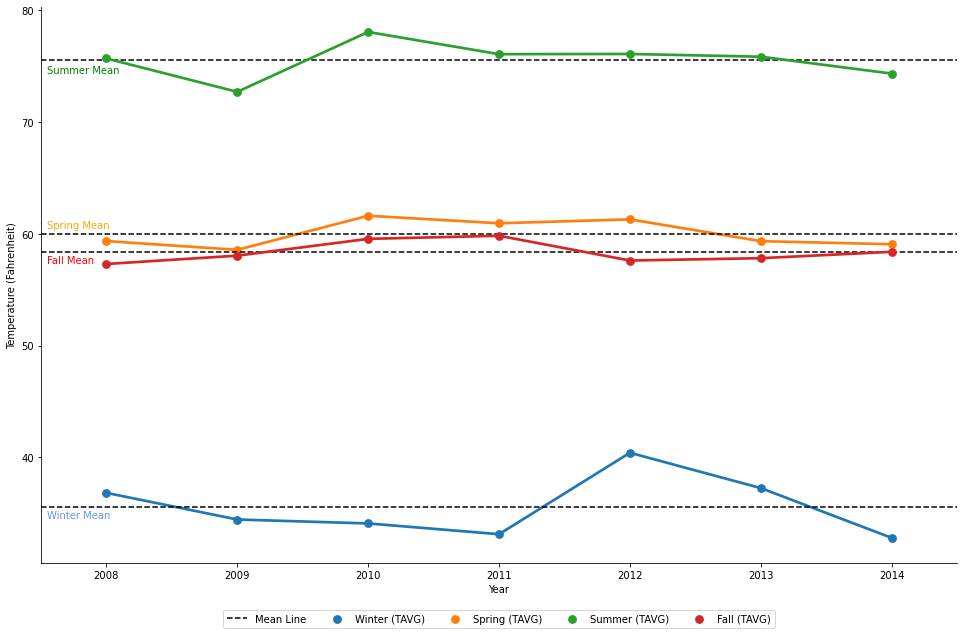

In [11]:
#cast as a float in order to display in graph
combined_seasonal_data = combined_seasonal_data.astype(float)
combined_seasonal_data['Year'] = combined_seasonal_data['Year'].astype(int)

#show season temperature data over the years
season_avg = ['Year', 'Winter (TAVG)', 'Spring (TAVG)', 'Summer (TAVG)', 'Fall (TAVG)']
season_avg = combined_seasonal_data[season_avg]
data = season_avg.melt('Year', var_name='',  value_name='Temp (Fahrenheit)')
graph = sns.catplot(x="Year", y="Temp (Fahrenheit)", hue='', data=data, kind='point', height=8.27, aspect=11.7/8.27)
graph._legend.remove() 

#show average line across the seasons, as a visual indicator for deviation from total average 
winter_mean = season_avg['Winter (TAVG)'].mean()
spring_mean = season_avg['Spring (TAVG)'].mean()
summer_mean = season_avg['Summer (TAVG)'].mean()
fall_mean = season_avg['Fall (TAVG)'].mean()

graph.map(plt.axhline, y=winter_mean, ls='--', c='black', label='Mean Line')
graph.map(plt.annotate, s="Winter Mean", xy=(-0.45,winter_mean-1), color='cornflowerblue')

graph.map(plt.axhline, y=spring_mean, ls='--', c='black')
graph.map(plt.annotate, s="Spring Mean", xy=(-0.45,spring_mean+0.5), color='orange')

graph.map(plt.axhline, y=summer_mean, ls='--', c='black')
graph.map(plt.annotate, s="Summer Mean", xy=(-0.45,summer_mean-1.2), color='green')

graph.map(plt.axhline, y=fall_mean, ls='--', c='black')
graph.map(plt.annotate, s="Fall Mean", xy=(-0.45,fall_mean-1), color='red')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.1), ncol=5)
graph.set_axis_labels("Year", "Temperature (Fahrenheit)")

**Analysis:** On first glance, there appear to be some anomalous years. In particular, Winter 2012 and the Summers of  2009 and 2010 seem worth investigating as we progress through our analysis. 

Investigate each season and look for large suicide counts with significant deviation values



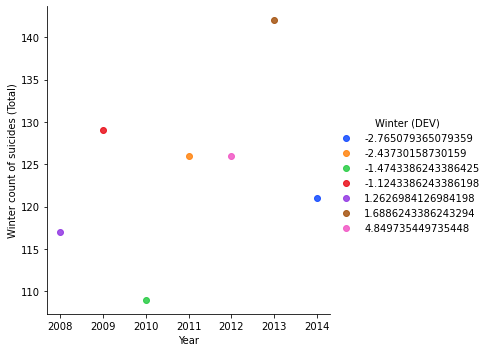

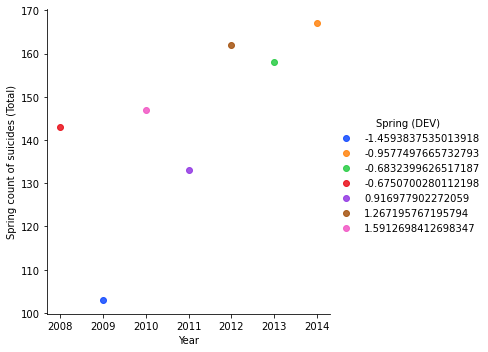

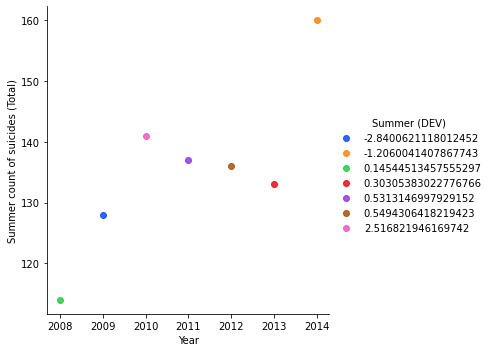

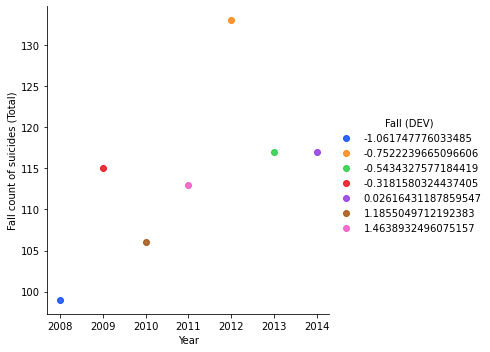

In [12]:
season_dev = ['Year', 'Winter (DEV)', 'Spring (DEV)', 'Summer (DEV)', 'Fall (DEV)', 
              'Winter count of suicides (Total)', 'Spring count of suicides (Total)',
             'Summer count of suicides (Total)', 'Fall count of suicides (Total)']
season_dev = combined_seasonal_data[season_dev]

p = 'bright'
sns.lmplot(x='Year', y='Winter count of suicides (Total)', hue='Winter (DEV)', data=season_dev, palette=p)
sns.lmplot(x='Year', y='Spring count of suicides (Total)', hue='Spring (DEV)', data=season_dev, palette=p)
sns.lmplot(x='Year', y='Summer count of suicides (Total)', hue='Summer (DEV)', data=season_dev, palette=p)
sns.lmplot(x='Year', y='Fall count of suicides (Total)', hue='Fall (DEV)', data=season_dev, palette=p)

**Analysis:** Within a season, we look at points with a large count of suicides and respectively checked whether or not there was a large deviation. By examining the following graphs, there appears to be no correlation between temperature variance and suicide count in that respective season.

Create a function for p-val testing

In [13]:
# Create function to test p-val
def check_p_val(p_val, alpha):
    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

Create a function to model all the seasons

In [14]:
def model_season(season):
    model_season_df = ['Year', 
                  f'{season} count of suicides (Total)', 
                  f'{season} (DEV)']
    model_season_df = combined_seasonal_data[model_season_df]
    model_season_df[f'{season} (DEV)'] = model_season_df[f'{season} (DEV)'].abs().astype('float')
    
    renamed = model_season_df.rename(columns={f'{season} count of suicides (Total)' : f'{season}SuicideCount', 
                       f'{season} (DEV)': f'{season}Dev'})

    # We can specify our model matrix using `pastsy`
    compare = f'{season}SuicideCount ~ {season}Dev'
    outcome, predictors = patsy.dmatrices(compare, renamed)
    model = sm.OLS(outcome, predictors)

    ## fit the model
    results = model.fit()

    ## look at the results
    print(results.summary())
    
    return renamed

In [15]:
winter_model = model_season("Winter")

                            OLS Regression Results                            
Dep. Variable:     WinterSuicideCount   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.191
Method:                 Least Squares   F-statistic:                   0.03654
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.856
Time:                        19:51:35   Log-Likelihood:                -25.708
No. Observations:                   7   AIC:                             55.42
Df Residuals:                       5   BIC:                             55.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.7836      8.938     13.738      0.0

In [16]:
spring_model = model_season("Spring")

                            OLS Regression Results                            
Dep. Variable:     SpringSuicideCount   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.7023
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.440
Time:                        19:51:35   Log-Likelihood:                -30.514
No. Observations:                   7   AIC:                             65.03
Df Residuals:                       5   BIC:                             64.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    167.2924     28.239      5.924      0.0

In [17]:
summer_model = model_season("Summer")

                            OLS Regression Results                            
Dep. Variable:     SummerSuicideCount   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.150
Method:                 Least Squares   F-statistic:                    0.2190
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.660
Time:                        19:51:36   Log-Likelihood:                -27.662
No. Observations:                   7   AIC:                             59.32
Df Residuals:                       5   BIC:                             59.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.5682      8.537     15.529      0.0

In [18]:
fall_model = model_season("Fall")

                            OLS Regression Results                            
Dep. Variable:       FallSuicideCount   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.8200
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.407
Time:                        19:51:36   Log-Likelihood:                -25.363
No. Observations:                   7   AIC:                             54.73
Df Residuals:                       5   BIC:                             54.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.2525      7.736     15.544      0.0

**Analysis:** The following seasonal models suggest that there is no correlation and these results are by chance. We will further explore this based on a p-value test.

In [19]:
#constant alpha
alpha = 0.01

#p-values for winter, spring, summer, and fall respectively
p_val_winter = 0.856 
p_val_spring = 0.440
p_val_summer = 0.660 
p_val_fall = 0.407

print("Winter: ", end="")
check_p_val(p_val_winter, alpha)

print("Spring: ", end="")
check_p_val(p_val_spring, alpha)

print("Summer: ", end="")
check_p_val(p_val_summer, alpha)

print("Fall: ", end="")
check_p_val(p_val_fall, alpha)

Winter: We do not have evidence to reject the null hypothesis.
Spring: We do not have evidence to reject the null hypothesis.
Summer: We do not have evidence to reject the null hypothesis.
Fall: We do not have evidence to reject the null hypothesis.


**Analysis:** Using an alpha of 0.01, our large p value suggests that we have found these results by chance. Thus, we fail to reject the null hypothesis.

Create regression line function

In [20]:
#Show regression line
def plot_regression(season, model, slope, intercept):
    sns.scatterplot(x=f'{season}Dev', y=f'{season}SuicideCount', data=model, alpha=1, s=100)

    # Generate and plot the model fit line
    xs = np.linspace(model[f'{season}Dev'].min(), model[f'{season}Dev'].max())
    ys = slope * xs + intercept 
    plt.plot(xs, ys, '--k', linewidth=2, label='Regression Line')

    plt.xlabel(f'{season} Temperature Deviation (Absolute Value)')
    plt.ylabel(f'{season} suicide count')
    plt.legend()

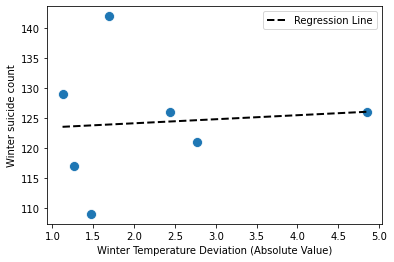

In [21]:
plot_regression("Winter", winter_model, 0.6739, 122.7836)

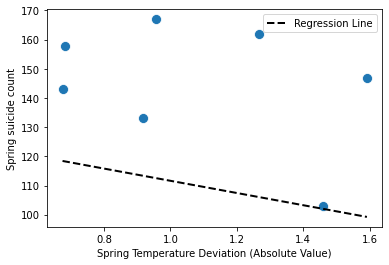

In [22]:
plot_regression("Spring", spring_model, -20.9309, 132.5682)

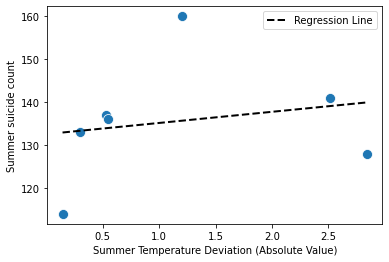

In [23]:
plot_regression("Summer", summer_model, 2.5979, 132.5682)

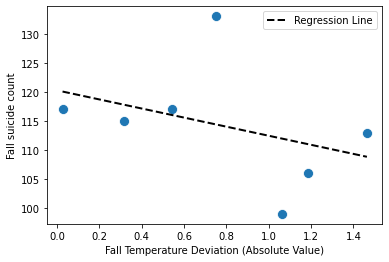

In [24]:
plot_regression("Fall", fall_model, -7.8054, 120.2525)

**Analysis:** By plotting the regression line we are able to notice a distinct lack of meaningful correlation. This further suggests that there is no relationship between seasonal temperature deviation and seasonal suicide count.

### Part 2: Do suicide rates differ between men and women in years when there is higher temperature fluctuation?

Create a function that takes in a dataframe and prepares the annual data which we will use to analyze

In [25]:
#function that will add annual data
def calculate_annual_data(station):
    station = station.set_index(['DATE'])
    column_names = ['Year', 'Annual Avg', 'Annual Dev']
    station_annual_avg = pd.DataFrame(columns = column_names)
    
    #calculate seasonal average and extremes
    for i in range(7):
        year = str(2008 + i)
        station_annual_avg = station_annual_avg.append({'Year':year}, ignore_index=True)
        
        station_annual_avg.at[i, 'Annual Avg'] = station.loc[str(2007 + i) + '-12-01': year + '-11-31']['TAVG'].mean()

    
    annual_mean = station_annual_avg['Annual Avg'].mean()

    #calculate deviation 
    for i in range(7):
        station_annual_avg.at[i, 'Annual Dev'] = station_annual_avg.at[i, 'Annual Avg'] - annual_mean
    
    return station_annual_avg

Create and display new annual dataframe

In [26]:
#call the function to get the seasonal and suicide data for the given station
combined_annual_data = calculate_annual_data(combined)

col = combined_annual_data.columns.values.tolist()[1:]
combined = combined_seasonal_data.join(combined_annual_data[col])
display(combined)

,Year,Winter (TMAX),Winter (TMIN),Winter (TAVG),Winter (DEV),Spring (TMAX),Spring (TMIN),Spring (TAVG),Spring (DEV),Summer (TMAX),...,Fall (DEV),Count of Suicides (Total),Count of suicides (Females),Count of suicides (Males),Winter count of suicides (Total),Spring count of suicides (Total),Summer count of suicides (Total),Fall count of suicides (Total),Annual Avg,Annual Dev
0,2008,68.000000,11.000000,36.822222,1.262698,96.666667,13.666667,59.351307,-0.675070,96.666667,...,-1.061748,473.0,125.0,348.0,117.0,143.0,114.0,99.0,55.4909,-0.276207
1,2009,64.666667,7.000000,34.435185,-1.124339,92.333333,13.000000,58.566993,-1.459384,92.333333,...,-0.318158,475.0,115.0,360.0,129.0,103.0,128.0,115.0,54.5059,-1.26116
2,2010,66.000000,13.666667,34.085185,-1.474339,102.333333,19.333333,61.617647,1.591270,102.333333,...,1.185505,503.0,129.0,374.0,109.0,147.0,141.0,106.0,57.2078,1.44066
3,2011,67.000000,7.000000,33.122222,-2.437302,103.666667,19.666667,60.943355,0.916978,103.666667,...,1.463893,509.0,128.0,381.0,126.0,133.0,137.0,113.0,55.605,-0.162077
4,2012,63.000000,13.333333,40.409259,4.849735,99.000000,26.000000,61.293573,1.267196,99.000000,...,-0.752224,557.0,163.0,391.0,126.0,162.0,136.0,133.0,57.7359,1.96878
5,2013,61.000000,11.666667,37.248148,1.688624,99.333333,19.333333,59.343137,-0.683240,99.333333,...,-0.543433,550.0,146.0,404.0,142.0,158.0,133.0,117.0,55.6858,-0.081255
6,2014,68.000000,4.666667,32.794444,-2.765079,92.333333,13.000000,59.068627,-0.957750,90.666667,...,0.026164,565.0,172.0,393.0,121.0,167.0,160.0,117.0,54.1384,-1.62874


Investigate each gender and look for large suicide counts with significant annual deviation values.

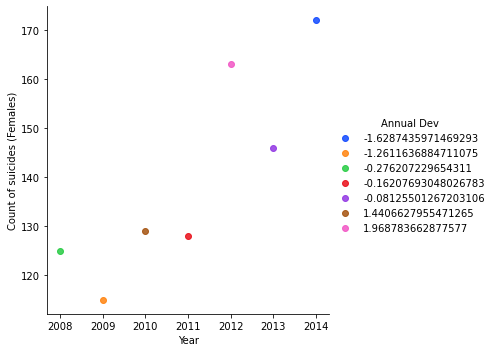

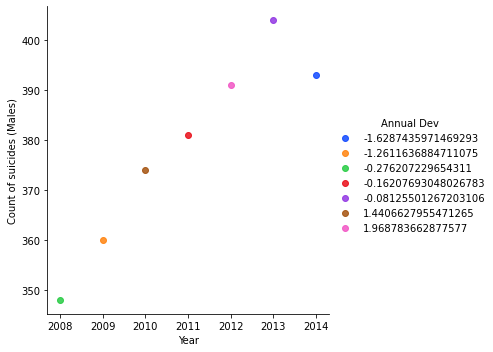

In [27]:
annual_dev = ['Year', 
              'Count of suicides (Females)', 'Count of suicides (Males)',
              'Annual Dev']
annual_dev = combined[annual_dev]

p = 'bright'
sns.lmplot(x='Year', y='Count of suicides (Females)', hue='Annual Dev', data=annual_dev, palette=p)
sns.lmplot(x='Year', y='Count of suicides (Males)', hue='Annual Dev', data=annual_dev, palette=p)

**Analysis:** Our results suggest that there may be a relationship between annual deviation value and suicide count. In particular, years 2012 and 2014 have both high female and male suicide count and high annual temperature deviation.

Create a model to check P value and also for regression to confirm our investigation

In [28]:
combined['Annual Dev (Absolute)'] = combined['Annual Dev'].abs().astype('float')
annual_dev = ['Year', 
              'Count of suicides (Females)', 'Count of suicides (Males)',
              'Annual Dev (Absolute)']
annual_dev = combined[annual_dev]

renamed = annual_dev.rename(columns={'Annual Dev (Absolute)' : 'AnnualDevAbsolute', 
                   'Count of suicides (Females)': 'CountSuicideFemales'})

# We can specify our model matrix using `pastsy`
compare = 'CountSuicideFemales ~ AnnualDevAbsolute'
outcome, predictors = patsy.dmatrices(compare, renamed)
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     CountSuicideFemales   R-squared:                       0.217
Model:                             OLS   Adj. R-squared:                  0.061
Method:                  Least Squares   F-statistic:                     1.388
Date:                 Mon, 15 Mar 2021   Prob (F-statistic):              0.292
Time:                         19:51:37   Log-Likelihood:                -29.923
No. Observations:                    7   AIC:                             63.85
Df Residuals:                        5   BIC:                             63.74
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           127.3774

**Analysis:**

1) Our model Total Suicide Count (Females) = 12.6646 * Annual Temperature Deviation + 127.3774

2) The following model suggests that there is no relationship because our P value is quite large and our R-squared value is small

In [29]:
alpha = 0.01
p_val =  0.292
check_p_val(p_val, alpha)

We do not have evidence to reject the null hypothesis.


**Analysis:** Using an alpha of 0.01, our large p value suggests that we have found these results by chance. Thus, we fail to reject the null hypothesis.

Plot regression to visualize data and confirm the model.

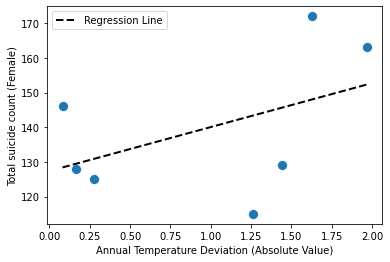

In [30]:
#Show regression line
sns.scatterplot(x='AnnualDevAbsolute', y='CountSuicideFemales', data=renamed, alpha=1, s=100)

# Generate and plot the model fit line
xs = np.linspace(renamed['AnnualDevAbsolute'].min(), renamed['AnnualDevAbsolute'].max())
ys = 12.6646 * xs + 127.3774 
plt.plot(xs, ys, '--k', linewidth=2, label='Regression Line')

plt.xlabel('Annual Temperature Deviation (Absolute Value)')
plt.ylabel('Total suicide count (Female)')
plt.legend()

**Analysis:** By plotting the regression line we notice that there is no obvious linear correlation between points. This further suggests that there is no relationship between annual temperature deviation and female suicide count.

Carry out similar task for males

In [31]:
renamed = annual_dev.rename(columns={'Annual Dev (Absolute)' : 'AnnualDevAbsolute', 
                                     'Count of suicides (Males)': 'CountSuicideMales'})

# We can specify our model matrix using `pastsy`
compare = 'CountSuicideMales ~ AnnualDevAbsolute'
outcome, predictors = patsy.dmatrices(compare, renamed)
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      CountSuicideMales   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.183
Method:                 Least Squares   F-statistic:                   0.07244
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.799
Time:                        19:51:37   Log-Likelihood:                -30.187
No. Observations:                   7   AIC:                             64.37
Df Residuals:                       5   BIC:                             64.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           375.7869     13.54

In [32]:
alpha = 0.01
p_val =  0.799
check_p_val(p_val, alpha)

We do not have evidence to reject the null hypothesis.


**Analysis:** By a similar analysis, our observed p value is significantly larger than our alpha suggesting that these results were by chance.

# Ethics & Privacy

**Question & Implications**
    
   We are interested in analyzing whether there is any correlation between deviations from the average seasonal and yearly temperatures in New York City from 2008 to 2014 and men and women’s suicide rates in the same time durations. Building upon prior studies that broadly suggest higher temperatures leading to increased suicide rates in England, Wales, United States, and Mexico, we would like to examine on a more granular level, both gender differences in suicide rates in regards to temperature fluctuations and suicide rates in regards to seasonal temperature changes in a large American city.	
   
   The stakeholders for our project are those whose mental health is prone to be affected by temperature fluctuations, as well as researchers in the fields of public health and environmental sciences. For the purpose and scope of this project, we only attempt and are able to discuss correlations, instead of suggesting any causations, as there are many other disparate factors that contribute to suicide risk. 

**The Data**

We were able to find available data that are de-identified and directly related to our questions from 2 public government sites, New York City Department of Health and Mental Hygiene and NOAA Climate.org. Specifically, the 5 datasets that we use in this project consist of annual suicide counts of males and females, broken down by 4 seasons from 2000-2014, and temperature trends from 2008-2014 in New York City. 

For this project, we chose to use the overlapping years from our datasets, which is from 2008 to 2014, as stated in our research question. Since the data that we use in this project was collected roughly 10 years ago and of relatively small samples, we cannot make the most up-to-date or representative inferences and conclusions about the current relationship between temperature trends and men and women’s suicide counts in a big city, such as New York City. 

Also, since our data is collectected from 3 weather stations in the northern and eastern part of NYC (JFK International, Laguardia Airport, Central Park, as seen in the map below), the southern and western part of NYC, such as Brooklyn and Staten Island, may be poorly represented by our data, despite being part of NYC. 

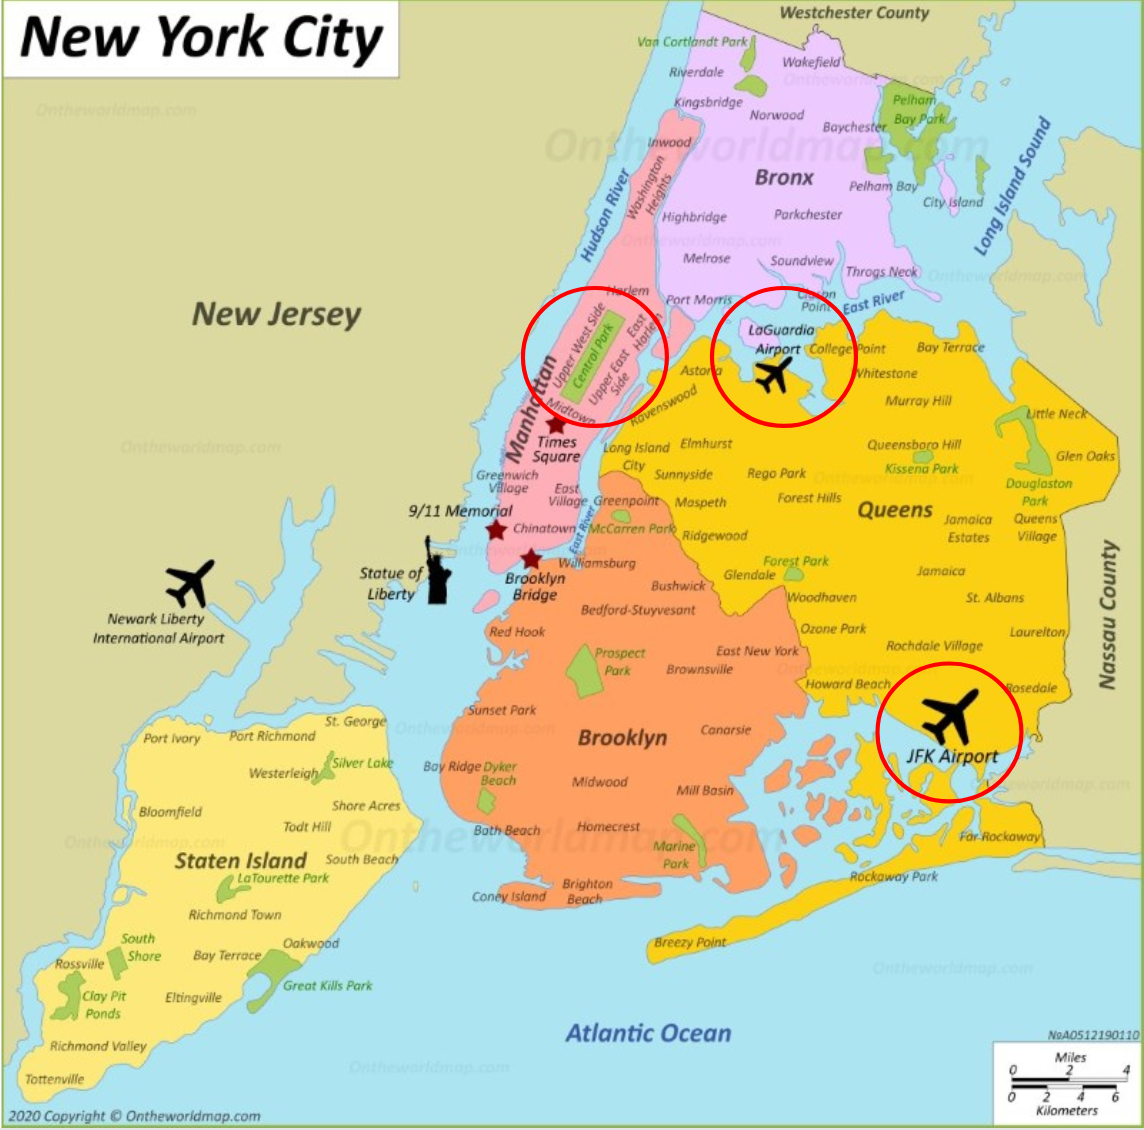

**Privacy & Informed Consent**

Our data on suicide counts in New York City comes from NYC DOHMH Bureau of Vital Statistics from 2008 to 2014 and NYC Department of Health and Mental Hygiene Population Estimates in 2014, and our data on temperature trends in New York City comes from the Global Historical Climatology Network. Both of them are publicly available statistics from government sites and are environmental and societal, so informed consent is not relevant to us in this project. 

Privacy for persons is a significant concern when dealing with sensitive topics like health outcomes, especially in the realm of mental health and suicide. There is both concern for the anonymity of the individuals whose data are being directly recorded, as well as their friends and family members who might be either directly or indirectly affected. For the purposes of our project, privacy concerns are not much of an issue as our data were anonymized before they were in our possession. There is no personally identifiable information about the individuals who committed suicide, other than the city in which they lived and the year in which they died. As far as we can tell, these data were stored securely on government servers, and were only viewable to the public in the form that we attained them. As such, we consider our suicide data to be very low risk, and the risk mitigation efforts were carried out by entities other than ourselves. 
	
Regarding our weather datasets, it seems appropriate to us to consider these data zero risk. Privacy is primarily a concern for individuals and groups of individuals, and these data have no potential for nefarious applications so far as we can tell.

**Evaluation**

We will evaluate the project based on our ability to carry out statistical analysis and identify a relationship between temperature trends and the number of suicides in New York City, or lack thereof. Our metric of success is whether or not we can statistically establish that there is or is not such a relationship, and confidently reject or fail to reject our null hypothesis. 

**Analysis**

Weather patterns may have many potential downstream effects, and suicide rates may be impacted by many upstream causes. As such, it is impossible to list all of the possible spurious correlations which could be reflected in our analyses, but we will try to identify a few. Firstly, it is possible that large temperature fluctuations or particularly cold or hot seasons could cause people to spend more time indoors, perhaps reducing local spending and causing the economy to slow. When the economy slows, people lose jobs, and unemployment is a known cause of suicide. So it is possible that a correlation between temperature fluctuation and suicide rates in NYC could be mediated by a third variable that is the economy. Alternatively, it is possible that certain temperature trends are linked to political decisions that have implications for mental health services, and that an increase or decrease in mental health services availability could lead to an increase or decrease in suicides. Given that we have fairly limited data and are only measuring two variables, it is not possible for us to do any sort of causal inference in our project. 

We did not use any proxies in our analysis; our data are a direct reflection of the variables we set out to analyze. There are therefore no inferred latent variables that we need to worry about. 

**Transparency & Appeal**

Our model is about as transparent as a model can possibly be. There are no computations taking place out of plain view, and our findings are the result of very straightforward statistical calculations. Our model is also not carrying out any sort of predictions, so appeals and refusals are not relevant to our project. 

**Continuous Monitoring**

Given that we used retrospective analysis to answer our question, there is no appropriate back and forth that our model can have with the variables in the world that we wish to understand. This is one of the limitations of our approach, but we feel confident that our model could be useful with any similar datasets that one could input. Specifically, it could be used to answer a similar set of questions in a different city with different weather and suicide data. 

We do not believe that any of the outputs of our data have seriously harmful implications, but one concern is our failure to identify a relationship between temperature trends and suicide rates could lead some readers to believe that temperature trends cannot possibly have any effects on mental health and mental health outcomes. We failed to reject our null hypothesis, but this does not preclude the possibility of some relationship existing between particular types of temperature trends or irregularities and some undesirable mental health outcomes. 

# Conclusion & Discussion

In summary, we failed to reject the null hypothesis for either of our two research questions. We found that suicide rates in a given season did not differ when average temperatures in that season deviated from typical seasonal temperatures between 2008 and 2014 in New York City. We were also unable to identify a difference between suicide rates among men and women in years when there was higher temperature fluctuation. 

Our project did have significant limitations, the most noteworthy being a relatively limited set of data. Our data only covered a small geographical area, and relatively short length of time (7 years). While we were unable to identify any meaningful relationship between temperature fluctuations and suicide rates, this may have been in part attributable to the limits of our data. Were we to have conducted a larger scale version of this project, with the same question but larger geographical and temporal scope, we may well have identified some macro level trends that were unidentifiable given the constrained data we used for our analyses. It may be the case, for example, that temperature fluctuations are more severe in places other than New York City, and that these more severe changes might have stronger correlations with mental health outcomes and suicide. 

Another limitation worth mentioning is the fact that our weather data were averages from 3 separate concurrent measurements from different weather stations in New York City (see map in Ethics & Privacy section). This may have eliminated some of the microclimate variability observed in the real world, thus reducing the temperature perceptions of residents in certain areas to an average. We recognize that weather patterns can have many downstream effects, and some of these effects may themselves be correlated with higher suicide rates, but we were unable to identify or investigate any such relationship in this project.

Despite limitations, our null result may serve as a useful jumping off point for any others interested in pursuing the question of whether or not a relationship exists between temperature fluctuation and suicide rates. 

# Team Contributions

Eli Marx-Kahn: Wrote title, hypothesis, ethics and privacy (privacy, evaluation, analysis, transparency & appeal, continuous monitoring), and conclusion & discussion. Also made small contributions to EDA text.

Sherry Ma: Background research, wrote overview, background & prior work, ethics and privacy (question, implications, the data, and informed consent).

Jonathan Chou: Coding for data cleaning and EDA. 

Kevin Lee: Coding for data cleaning and EDA. 

Team collaboration: Research questions, finding datasets.